# Penguine data set 

The data folder contains a csv file: penguins_size.csv
• penguins_size.csv: Simplified data from original penguin data sets. Contains variables: o species: penguin species (Chinstrap, Adélie, or Gentoo)
    o culmen_length_mm: culmen length (mm)
    o culmen_depth_mm: culmen depth (mm)
    o flipper_length_mm: flipper length (mm)
    o body_mass_g: body mass (g)
    o island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) o sex: penguin sex
    
The objective of this program is to predict the class of penguin species


In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


penguin = pd.read_csv('penguins_size.csv')
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### find nulls and Explore continuous features

In [48]:
penguin.isnull().sum()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Clean continuous variables
    1. Fill in missing values
    2. Drop irrelevant/repetitive variables such as sex
    3. convert name attributes into numerical


#### Fill in missing values  such as NaN with average

In [49]:
penguin['culmen_length_mm'].fillna(penguin['culmen_length_mm'].mean(), inplace=True)
penguin['culmen_depth_mm'].fillna(penguin['culmen_depth_mm'].mean(), inplace=True)
penguin['flipper_length_mm'].fillna(penguin['flipper_length_mm'].mean(), inplace=True)
penguin['body_mass_g'].fillna(penguin['body_mass_g'].mean(), inplace=True)


#### drop sex since its not needed when determineing species

In [50]:
# gender_num = {'MALE': 0, 'FEMALE': 1}
# penguin['sex'] = penguxxin['sex'].map(gender_num)
# penguin['sex'].fillna(penguin['sex'].mean(), inplace=True)

penguin.drop(['sex'], axis=1, inplace=True)



#### convert name attributes into numerical
##### island: 'Torgersen': 1, 'Biscoe': 2,  'Biscoe': 3
##### species = Adelie': 1, 'Chinstrap': 2,  'Gentoo': 3 


In [51]:
island_num = {'Torgersen': 1, 'Biscoe': 2,  'Dream': 3 }
penguin['island'] = penguin['island'].map(island_num)
species_num = {'Adelie': 1, 'Chinstrap': 2,  'Gentoo': 3 }
penguin['species'] = penguin['species'].map(species_num)
penguin.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.10000,18.70000,181.000000,3750.000000
1,1,1,39.50000,17.40000,186.000000,3800.000000
2,1,1,40.30000,18.00000,195.000000,3250.000000
3,1,1,43.92193,17.15117,200.915205,4201.754386
4,1,1,36.70000,19.30000,193.000000,3450.000000


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.10000,18.70000,181.000000,3750.000000
1,1,1,39.50000,17.40000,186.000000,3800.000000
2,1,1,40.30000,18.00000,195.000000,3250.000000
3,1,1,43.92193,17.15117,200.915205,4201.754386
4,1,1,36.70000,19.30000,193.000000,3450.000000


### EDA
    1. compare atributes agaisnt speices
    2. compare attribute average with the rest of the attributes

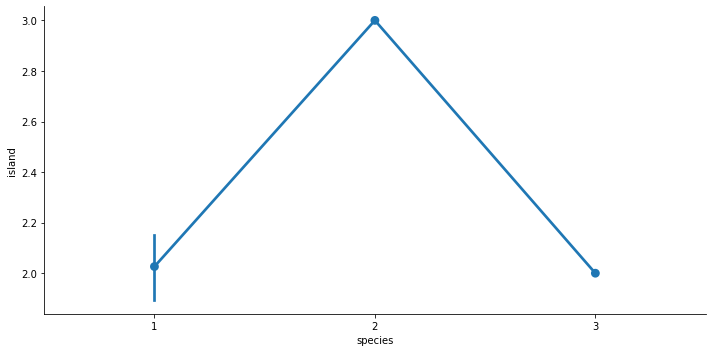

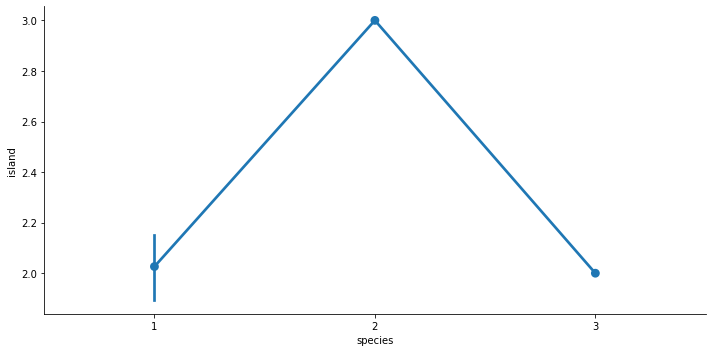

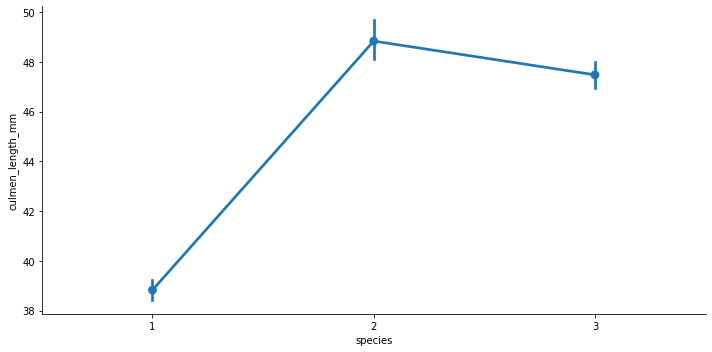

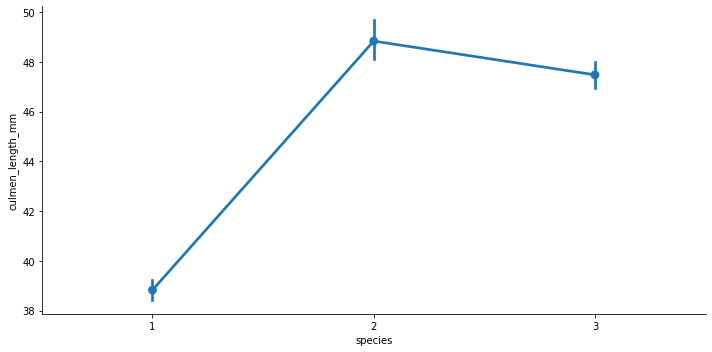

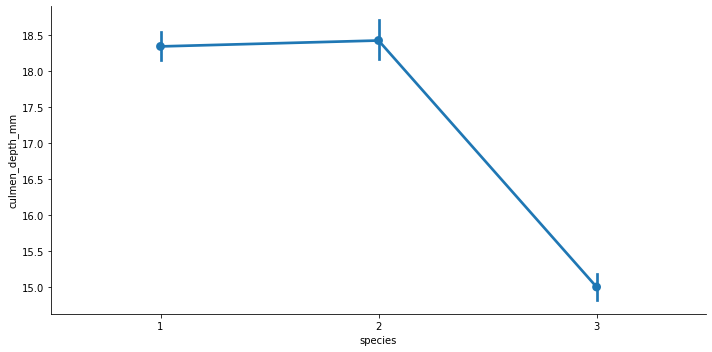

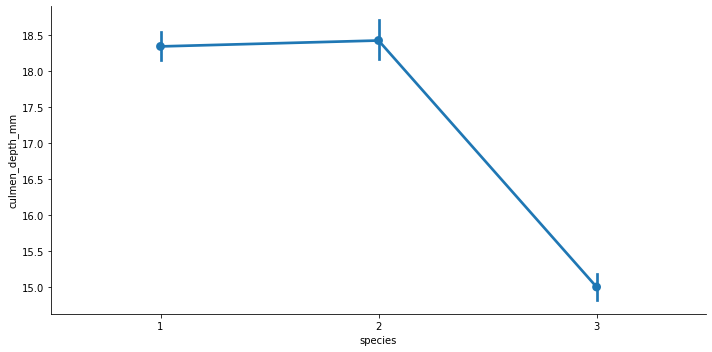

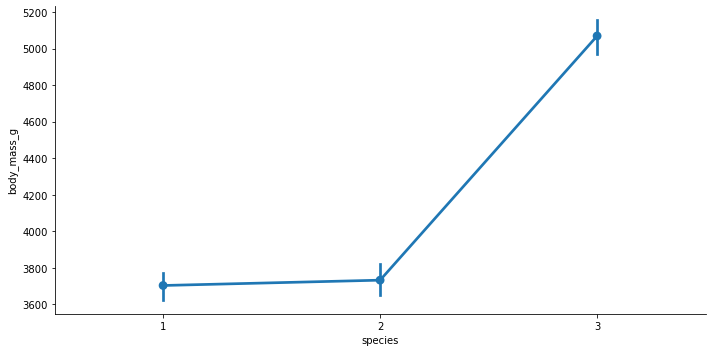

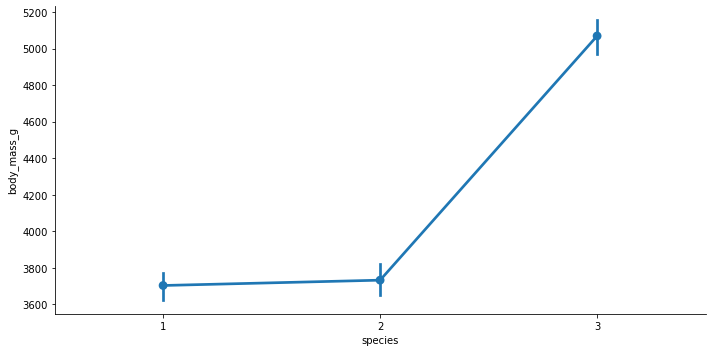

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

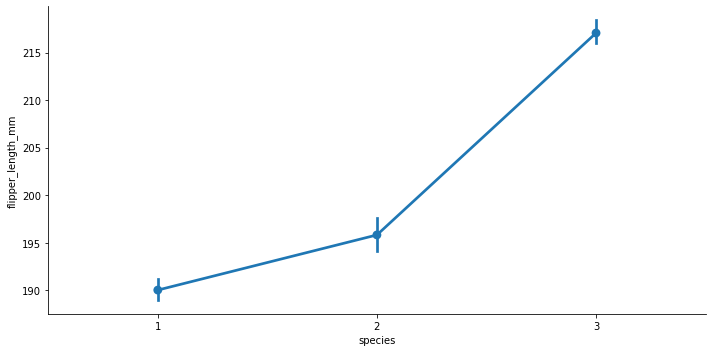

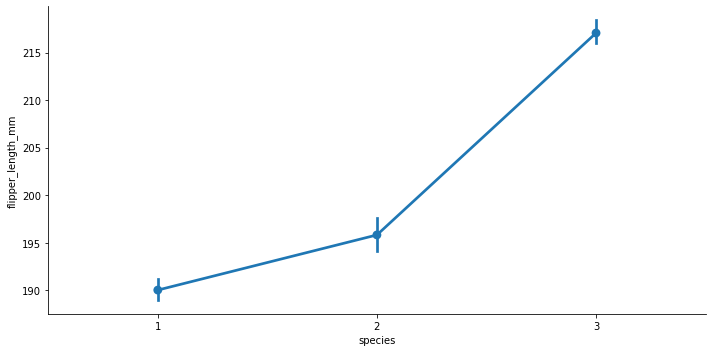

In [52]:
for i, col in enumerate(['species']):
    plt.figure(i)
    sns.catplot(x=col, y='island', data=penguin, kind='point', aspect=2, )
for i, col in enumerate(['species']):
    plt.figure(i)
    sns.catplot(x=col, y='culmen_length_mm', data=penguin, kind='point', aspect=2, )
for i, col in enumerate(['species']):
    plt.figure(i)
    sns.catplot(x=col, y='culmen_depth_mm', data=penguin, kind='point', aspect=2, )
for i, col in enumerate(['species']):
    plt.figure(i)
    sns.catplot(x=col, y='body_mass_g', data=penguin, kind='point', aspect=2, )
for i, col in enumerate(['species']):
    plt.figure(i)
    sns.catplot(x=col, y='flipper_length_mm', data=penguin, kind='point', aspect=2, )
    

#### Here in the output of cell 6 we can see that species 1 has the smallest culmen_length_mm on average 
#### and species 3 has the smallest culmen_depth_mm and the most body_mass_g, flipper_length_mm on average 

In [53]:
penguin.groupby('species').mean()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,,
1,2.026316,38.825144,18.338495,190.025758,3703.958910
2,3.000000,48.833824,18.420588,195.823529,3733.088235
3,2.000000,47.475983,14.999606,217.055768,5068.965761


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,,
1,2.026316,38.825144,18.338495,190.025758,3703.958910
2,3.000000,48.833824,18.420588,195.823529,3733.088235
3,2.000000,47.475983,14.999606,217.055768,5068.965761


#### In cell 7 the function compares attribute averages with the rest of the attributes, this shows us the same result j

### Split into train, validation, and test set


In [54]:
features = penguin.drop('species', axis=1)
labels = penguin['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=42)

### Write out data

In [55]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)



X_train2.to_csv('train_features2.csv', index=False)
X_val2.to_csv('val_features2.csv', index=False)
X_test2.to_csv('test_features2.csv', index=False)

y_train2.to_csv('train_labels2.csv', index=False)
y_val2.to_csv('val_labels2.csv', index=False)
y_test2.to_csv('test_labels2.csv', index=False)

### Read in data

In [56]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

tr_features2 = pd.read_csv('train_features2.csv')
tr_labels2 = pd.read_csv('train_labels2.csv')

val_features2 = pd.read_csv('val_features2.csv')
val_labels2 = pd.read_csv('val_labels2.csv')

te_features2 = pd.read_csv('test_features2.csv')
te_labels2 = pd.read_csv('test_labels2.csv')
penguin.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.10000,18.70000,181.000000,3750.000000
1,1,1,39.50000,17.40000,186.000000,3800.000000
2,1,1,40.30000,18.00000,195.000000,3250.000000
3,1,1,43.92193,17.15117,200.915205,4201.754386
4,1,1,36.70000,19.30000,193.000000,3450.000000


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.10000,18.70000,181.000000,3750.000000
1,1,1,39.50000,17.40000,186.000000,3800.000000
2,1,1,40.30000,18.00000,195.000000,3250.000000
3,1,1,43.92193,17.15117,200.915205,4201.754386
4,1,1,36.70000,19.30000,193.000000,3450.000000


### Hyperparameter tuning
#### RF
#### MLP
#### svm 

### Plot learning curve 

In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 10),
):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _  = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")


In [58]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Random Forest
I chose random forest to predict which species in this dataset. This data set can be classified by three species making the RF the right choice of an algorithm as it pertains only to classification problem types. Although the performance speed is not fast, the performance was good with the 60-20-20 split having results of Accuracy: 0.986 / Precision: 0.986 / Recall: 0.986 / Latency: 18.8ms. RF being in second place for its scores has more latency than any of the other algorithms

In [59]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

GDRF = GridSearchCV(rf, parameters, cv=5)
GDRF.fit(tr_features, tr_labels.values.ravel())

print_results(GDRF)


BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.961 (+/-0.038) for {'max_depth': 2, 'n_estimators': 5}
0.961 (+/-0.024) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.019) for {'max_depth': 2, 'n_estimators': 100}
0.971 (+/-0.036) for {'max_depth': 10, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 10, 'n_estimators': 50}
0.986 (+/-0.038) for {'max_depth': 10, 'n_estimators': 100}
0.971 (+/-0.036) for {'max_depth': 20, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 20, 'n_estimators': 50}
0.986 (+/-0.038) for {'max_depth': 20, 'n_estimators': 100}
0.976 (+/-0.052) for {'max_depth': None, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': None, 'n_estimators': 50}
0.986 (+/-0.038) for {'max_depth': None, 'n_estimators': 100}
BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.961 (+/-0.038) for {'max_depth': 2, 'n_estimators': 5}
0.961 (+/-0.024) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.019) for {'max_depth': 2, 'n_estimators': 100}
0.971 (+/

In [60]:
GDRF.best_estimator_

RandomForestClassifier(max_depth=10)

RandomForestClassifier(max_depth=10)

In [61]:
joblib.dump(GDRF.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

['RF_model.pkl']

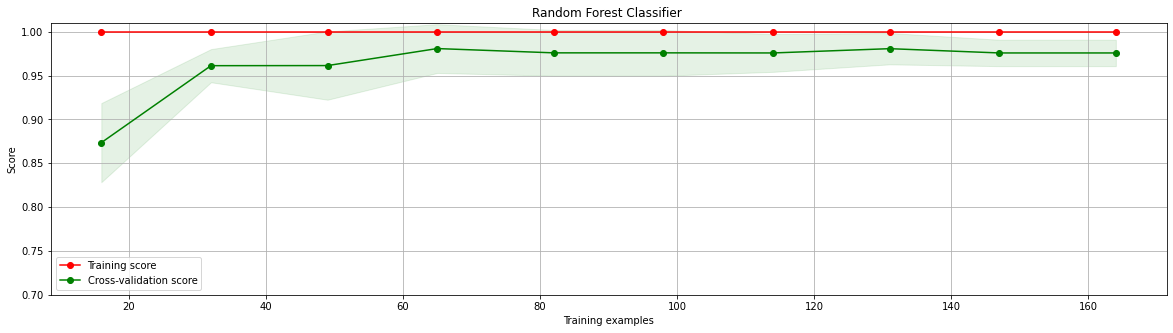

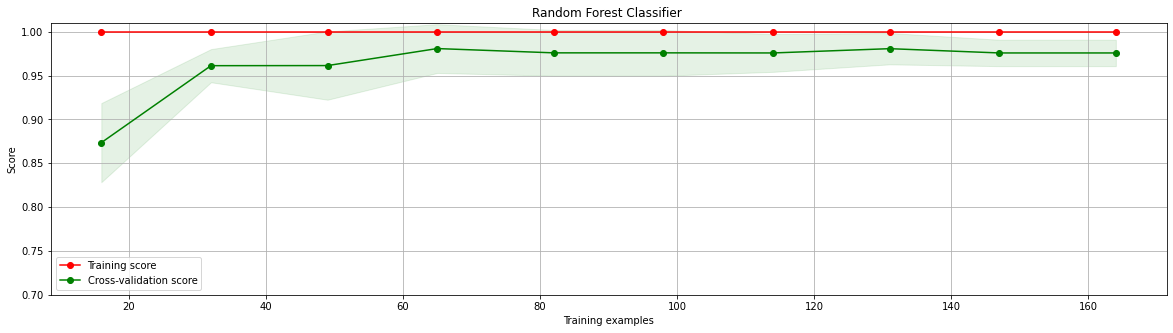

In [62]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [GDRF.best_estimator_.n_estimators],
    'max_depth': [GDRF.best_estimator_.max_depth]
}


title = 'Random Forest Classifier '.format(GDRF.best_estimator_.n_estimators, GDRF.best_estimator_.max_depth)
estimator = rf
plot_learning_curve(
    estimator, title, tr_features, tr_labels.values.ravel(), axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=None
)

### RF wit 80-10-10 split

In [63]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

GDRF2 = GridSearchCV(rf, parameters, cv=5)
GDRF2.fit(tr_features2, tr_labels2.values.ravel())

print_results(GDRF2)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.909 (+/-0.083) for {'max_depth': 2, 'n_estimators': 5}
0.967 (+/-0.027) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.018) for {'max_depth': 2, 'n_estimators': 100}
0.967 (+/-0.036) for {'max_depth': 10, 'n_estimators': 5}
0.971 (+/-0.018) for {'max_depth': 10, 'n_estimators': 50}
0.982 (+/-0.033) for {'max_depth': 10, 'n_estimators': 100}
0.971 (+/-0.037) for {'max_depth': 20, 'n_estimators': 5}
0.978 (+/-0.027) for {'max_depth': 20, 'n_estimators': 50}
0.982 (+/-0.033) for {'max_depth': 20, 'n_estimators': 100}
0.967 (+/-0.027) for {'max_depth': None, 'n_estimators': 5}
0.978 (+/-0.027) for {'max_depth': None, 'n_estimators': 50}
0.978 (+/-0.027) for {'max_depth': None, 'n_estimators': 100}
BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.909 (+/-0.083) for {'max_depth': 2, 'n_estimators': 5}
0.967 (+/-0.027) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.018) for {'max_depth': 2, 'n_estimators': 100}
0.967 (+/

In [64]:
GDRF2.best_estimator_

RandomForestClassifier(max_depth=10)

RandomForestClassifier(max_depth=10)

In [65]:
joblib.dump(GDRF2.best_estimator_, 'RF2_model.pkl')

['RF2_model.pkl']

['RF2_model.pkl']

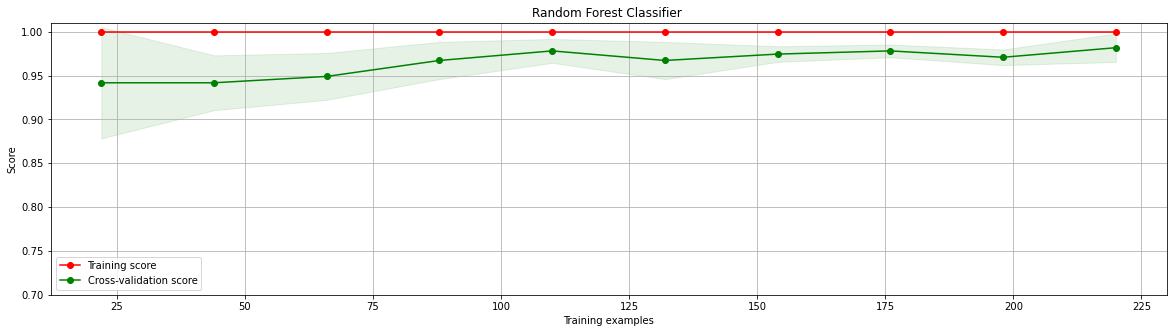

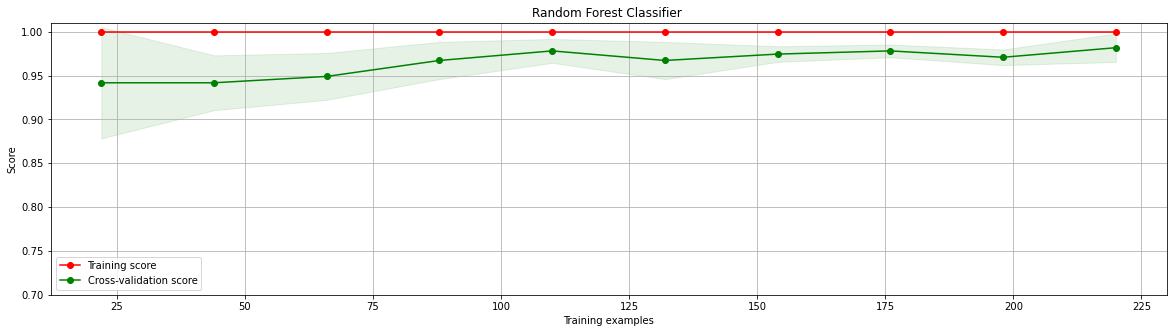

In [66]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [GDRF2.best_estimator_.n_estimators],
    'max_depth': [GDRF2.best_estimator_.max_depth]
}


title = 'Random Forest Classifier '.format(GDRF2.best_estimator_.n_estimators, GDRF2.best_estimator_.max_depth)
estimator = rf
plot_learning_curve(
    estimator, title, tr_features2, tr_labels2.values.ravel(), axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=None
)

#### MLP
Although MLP is used for complex relationships where performance of the model is the main focus to look at, the results were the worst compared to the other algorithms. MLP with the 80-10-10 split had the better of the two scores with -- Accuracy: 0.743 / Precision: 0.743 / Recall: 0.743 / Latency: 6.3ms. the 80-10-10 set had better results however, took twice as long. After analyzing the results, MLP is not the best suitable algorithm for this dataset.

In [ ]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

GDMLP = GridSearchCV(mlp, parameters, cv=5)
GDMLP.fit(tr_features, tr_labels.values.ravel())

print_results(GDMLP)

/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [ ]:
GDMLP.best_estimator_

In [ ]:
joblib.dump(GDMLP.best_estimator_, 'MLP_model.pkl')

In [ ]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [GDMLP.best_estimator_.hidden_layer_sizes],
    'activation': [GDMLP.best_estimator_.activation],
    'learning_rate': [GDMLP.best_estimator_.learning_rate]
}


title = 'MLP '.format(GDMLP.best_estimator_.hidden_layer_sizes,GDMLP.best_estimator_.activation, GDMLP.best_estimator_.learning_rate)
estimator = mlp
plot_learning_curve(
    estimator, title, tr_features, tr_labels.values.ravel(), axes=None, ylim=(0.3, 1.01), cv=None, n_jobs=None
)

### ### MLP_2 wit 80-10-10 split

In [ ]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

GDMLP2 = GridSearchCV(mlp, parameters, cv=5)
GDMLP2.fit(tr_features2, tr_labels2.values.ravel())

print_results(GDMLP2)

In [ ]:
GDMLP2.best_estimator_

In [ ]:
joblib.dump(GDMLP2.best_estimator_, 'MLP2_model.pkl')

In [ ]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [GDMLP2.best_estimator_.hidden_layer_sizes],
    'activation': [GDMLP2.best_estimator_.activation],
    'learning_rate': [GDMLP2.best_estimator_.learning_rate]
}


title = 'MLP '.format(GDMLP2.best_estimator_.hidden_layer_sizes,GDMLP2.best_estimator_.activation, GDMLP2.best_estimator_.learning_rate)
estimator = mlp
plot_learning_curve(
    estimator, title, tr_features2, tr_labels2.values.ravel(), axes=None, ylim=(0.3, 1.01), cv=None, n_jobs=None
)

### SVM wit 60-20-20 split
I chose SVM to predict which species in this dataset. When analyzing the data, there is a good amount of outliers, and 5 dimensions making the dataset complex to work with. This fits the criteria when using the SVM and is proven in the results, SVM with the 60-20-20 split had better of the two with -- Accuracy: 0.986 / Precision: 0.986 / Recall: 0.986 / Latency: 5.5ms. This algorithm performed the best out of all the algorithms in both ratios. Although this SVM with a ratio of 60-20-20 has the best score the SVM with a ratio 80-10-10 had less latency and score but ultimately the 60-20-20 is the best overall.

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [ ]:
cv.best_estimator_

In [ ]:
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

In [ ]:
rf = SVC()
parameters = {
    'kernel': [cv.best_estimator_.kernel],
    'C': [cv.best_estimator_.C]
}

gscv = GridSearchCV(rf, parameters, cv=5)

title = 'Random Forest Classifier '.format(cv.best_estimator_.kernel, cv.best_estimator_.C)
estimator = rf
plot_learning_curve(
    estimator, title, tr_features, tr_labels.values.ravel(), axes=None, ylim=(0.3, 1.01), cv=None, n_jobs=None
)


In [ ]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv2 = GridSearchCV(svc, parameters, cv=5)
cv2.fit(tr_features2, tr_labels2.values.ravel())

print_results(cv2)

In [ ]:
cv2.best_estimator_

In [ ]:
joblib.dump(cv2.best_estimator_, 'SVM2_model.pkl')

In [ ]:
rf = SVC()
parameters = {
    'kernel': [cv2.best_estimator_.kernel],
    'C': [cv2.best_estimator_.C]
}

gscv = GridSearchCV(rf, parameters, cv=5)

title = 'Random Forest Classifier '.format(cv2.best_estimator_.kernel, cv2.best_estimator_.C)
estimator = rf
plot_learning_curve(
    estimator, title, tr_features2, tr_labels2.values.ravel(), axes=None, ylim=(0.7, 1.01), cv=None, n_jobs=None
)


## Summary: Compare model results and final model selection

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

### Read in Models

In [ ]:
models = {}

for mdl in [ 'SVM', 'MLP', 'RF']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [ ]:
models

### Evaluate models on the validation set

In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average="micro"), 3)
    recall = round(recall_score(labels, pred,average="micro"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

### Evaluate best model on test set

In [ ]:
evaluate_model('SVM', models['SVM'], te_features, te_labels)

### Read in Models for  80-10-10

In [ ]:
models = {}

for mdl in [ 'SVM2', 'MLP2', 'RF2']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [ ]:
models

In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features2, val_labels2)

### Evaluate best model on test set for 80-10-10

In [ ]:
evaluate_model('SVM2', models['SVM2'], te_features2, te_labels2)

 After analyzing the results of all the algorithms, the best performance was the SVM on 60-20-20 ratio. The MLP algorithms performed the worst even though it had a similar criterion with SVM, The latency was the most as predicted however the performance was poor. I would have changed the MLP algorithm with another algorithm that is more suitable for this dataset. Although both splits performed simmilarly the 60-20-20 split was better.